In [1]:
import pandas as pd
import numpy as np

In [2]:
business = pd.read_csv('../data/filtered/res_on.csv')

In [3]:
reviews = pd.read_csv('../data/filtered/review_res_on.csv')

In [4]:
reviews_2016 = reviews[reviews['date'].str.contains('2016')]
#keep only reviews for businesses that have count >= 50
over_20_reviews = reviews_2016['business_id'].value_counts()[reviews_2016['business_id'].value_counts() >= 20].index.tolist()
reviews_2016 = reviews_2016[reviews_2016['business_id'].isin(over_20_reviews)]

In [9]:
reviews['month_year'] = pd.to_datetime(reviews['date']).dt.to_period('M')

business_id             month_year
--6MefnULPED_I942VcFNA  2008-08       1
                        2010-11       1
                        2010-12       2
                        2011-01       1
                        2011-05       1
                                     ..
zze6IysT7bJFS8gvi6fZ2A  2015-01       1
                        2015-06       1
                        2015-07       1
                        2015-11       1
zzvlwkcNR1CCqOPXwuvz2A  2017-05       3
Name: review_id, Length: 240244, dtype: int64

In [16]:
biglist = reviews[reviews['month_year'].dt.year == 2016].groupby(['business_id','month_year'])['review_id'].count()[(reviews.groupby(['business_id','month_year'])['review_id'].count()>5)].groupby('business_id').count()


In [20]:
biglist.sort_values(ascending=False)

business_id
C8_zdU7zGLUK3uC4e5AepQ    12
iGEvDk6hsizigmXhDKs2Vg    12
0a2O150ytxrDjDzXNfRWkA    12
yY3jNsrpCyKTqQuRuLV8gw    12
RtUvSWO_UZ8V3Wpj0n077w    12
                          ..
SKXfTKNxazyebsV19LYUxg     1
RyTKm8McePjwsL8ggEHOYA     1
Rh2smrKvcamnP8VBUgMI0Q     1
RdwHiTJzpCU4Q8pgsJhiKg     1
zyw5DjrRks7a8OhmBsgCQQ     1
Name: review_id, Length: 904, dtype: int64

In [18]:
len(biglist[biglist==12].index)

26

In [7]:
#find restaurants that have at least 20 reviews each month in 2016
over_20_reviews = reviews_2016['business_id'].value_counts()[reviews_2016['business_id'].value_counts() >= 20].index.tolist()

(1306,)

In [234]:
reviews_2016.isna().sum()

Unnamed: 0              0
review_id               0
user_id                 0
business_id             0
stars                   0
date                    0
text                    0
useful                  0
funny                   0
cool                    0
month                   0
year                    0
date_month_beginning    0
date_month              0
dtype: int64

In [9]:
#jan_2017_star = reviews[reviews['business_id'].isin(over_20_reviews) & reviews['date'].str.contains('2017-01')].groupby('business_id')['stars'].mean().reset_index()
#avg_stars_2016 = reviews_2016.groupby('business_id')['stars'].mean().reset_index()
business_data_2016 = business[business['business_id'].isin(over_20_reviews)][['business_id', 'neighborhood', 'latitude', 'longitude', 'categories']].reset_index(drop=True)

In [10]:
# Create bag of words for categories
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0.05)
vectorized_categories = vectorizer.fit_transform(business_data_2016['categories'])
business_categories = pd.DataFrame(vectorized_categories.toarray(), columns=vectorizer.get_feature_names_out())

# One hot encode neighborhoods
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', min_frequency=0.01)
neighborhoods = enc.fit_transform(business_data_2016['neighborhood'].values.reshape(-1,1)).toarray()

In [11]:
# Create dataframe with all features
business_data_2016 = pd.concat([business_data_2016, business_categories], axis=1)
business_data_2016 = pd.concat([business_data_2016, pd.DataFrame(neighborhoods, columns=enc.get_feature_names_out())], axis=1)
business_data_2016 = business_data_2016.drop(['categories', 'neighborhood'], axis=1, errors='ignore')

In [12]:
business_data_2016

,business_id,latitude,longitude,american,asian,bars,breakfast,brunch,burgers,cafes,...,x0_Ryerson,x0_Scarborough,x0_St. Lawrence,x0_The Annex,x0_Unionville,x0_Willowdale,x0_Yonge and Eglinton,x0_Yorkville,x0_nan,x0_infrequent_sklearn
0,NOHh2pgOTUBqp82IQlRQMQ,43.792978,-79.260276,0,0,0,1,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Rh2smrKvcamnP8VBUgMI0Q,43.653324,-79.395372,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,O_UC_izJXcAmkm6HlEyGSA,43.675958,-79.401184,0,0,1,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ww_MXl-qDLeYdYTZZ9KWbA,43.652368,-79.434077,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,yHCoJZh5nx0Onr5xgMaUHg,43.753721,-79.349421,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,OIdOJaNS8M624F58XGV3PQ,43.678554,-79.347584,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1302,fK1oj0dk9Bc6KsBk5mMDxg,43.665303,-79.465505,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1303,A2aOwMcP0DxGPr2El7eifA,43.848768,-79.360973,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1304,n2NRR4N-kmeDvhHJivHGkA,43.651606,-79.374881,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
reviews_2016['date'] = pd.to_datetime(reviews_2016['date'])

In [14]:
reviews_2016['month'] = reviews_2016['date'].dt.month
reviews_2016['year'] = reviews_2016['date'].dt.year

In [218]:
reviews_2016.sort_values('date_month').groupby('business_id').rolling('60d', on = 'date_month_beginning')['stars'].mean().reset_index()

,business_id,date_month_beginning,stars
0,-0NrB58jqKqJfuUCDupcsw,2016-01-31,4.000000
1,-0NrB58jqKqJfuUCDupcsw,2016-02-29,3.500000
2,-0NrB58jqKqJfuUCDupcsw,2016-02-29,3.333333
3,-0NrB58jqKqJfuUCDupcsw,2016-02-29,3.750000
4,-0NrB58jqKqJfuUCDupcsw,2016-02-29,3.800000
...,...,...,...
53140,zyw5DjrRks7a8OhmBsgCQQ,2016-08-31,3.333333
53141,zyw5DjrRks7a8OhmBsgCQQ,2016-09-30,3.000000
53142,zyw5DjrRks7a8OhmBsgCQQ,2016-10-31,3.500000
53143,zyw5DjrRks7a8OhmBsgCQQ,2016-10-31,3.333333


In [33]:
reviews_2016['date_month'] = reviews_2016['date'].dt.to_period('m')

In [35]:
now = pd.to_datetime('2017-01-01')

In [77]:
one_test = reviews_2016.sort_values('date')[['business_id', 'stars', 'date']]

In [80]:
results = one_test.groupby(['business_id', pd.PeriodIndex(data=one_test['date'], freq='M')])['stars'].mean()
results

business_id             date   
-0NrB58jqKqJfuUCDupcsw  2016-01    4.00
                        2016-02    3.75
                        2016-03    3.00
                        2016-04    3.50
                        2016-06    2.00
                                   ... 
zyw5DjrRks7a8OhmBsgCQQ  2016-07    4.00
                        2016-08    3.00
                        2016-09    3.00
                        2016-10    3.50
                        2016-12    1.00
Name: stars, Length: 13702, dtype: float64

In [115]:
results.index.get_level_values(0).unique()

Index(['-0NrB58jqKqJfuUCDupcsw', '-9u2uFwhlj3Yq4mG5IweoA',
       '-BbnAc9YEO6pjvJGEtFbVQ', '-CLTZ0cO-ooKDDmXHFoGMg',
       '-I7Vz5eDjc63xKmmt4Qx4g', '-ICGmF2qUVKdvOehVNgPbg',
       '-Ipm_8YXj9UoNNHagCvsNg', '-J6FVdY9pSgAdFmmalO-pQ',
       '-NNElpPRHRYUD0YHgXtgyQ', '-OxDX2fPQLYi6ChW2Z6xxQ',
       ...
       'zWOFKsBDFTYfU4Mp6lONTA', 'zb61eT_ChYctlCXcIqlW6Q',
       'zeiaHxtK2fTUz_jlPdIKPQ', 'zfQ855VX3SMA_54oVSN5Cw',
       'zgQHtqX0gqMw1nlBZl2VnQ', 'zo_z6lMRcwHqQF_Z1VZLpg',
       'zqPAwZbi5rS1dyHrKzDpMg', 'zrYpLdnGKA_EmOhgRCy_vg',
       'zs-T0uqKSHhYWSEok6oouw', 'zyw5DjrRks7a8OhmBsgCQQ'],
      dtype='object', name='business_id', length=1306)

In [117]:
idx = pd.MultiIndex.from_product([results.index.get_level_values(0).unique(), pd.period_range('2016-01', '2016-12', freq='M')])

In [106]:
master_table = pd.merge(pd.date_range(start='2016-01-01', end='2017-01-01', freq='M').to_series().rename("date"), pd.Series(reviews_2016['business_id'].unique()).rename('business_id'), how='cross')

In [126]:
results_final = results.reindex(idx, method='ffill')

In [138]:
#Turn date into columns
unstacked = results_final.unstack(level=1).reset_index()

In [219]:
unstacked.rename(columns=lambda x: str(x))

,month_business_id,month_2016-01,month_2016-02,month_2016-03,month_2016-04,month_2016-05,month_2016-06,month_2016-07,month_2016-08,month_2016-09,month_2016-10,month_2016-11,month_2016-12,q4_2016,q3_2016,q2_2016,q1_2016,h1_2016,h2_2016,year_2016
0,-0NrB58jqKqJfuUCDupcsw,4.00,3.750000,3.000000,3.500000,3.500000,2.000000,3.500000,3.000000,3.750,4.000,3.666667,2.500000,3.388889,3.416667,3.000000,3.583333,3.291667,3.402778,3.347222
1,-9u2uFwhlj3Yq4mG5IweoA,2.00,3.000000,3.500000,3.428571,4.000000,2.000000,4.500000,3.000000,4.500,4.500,2.000000,3.000000,3.166667,4.000000,3.142857,2.833333,2.988095,3.583333,3.285714
2,-BbnAc9YEO6pjvJGEtFbVQ,4.00,4.555556,4.333333,4.000000,4.500000,3.500000,4.500000,4.625000,4.500,4.000,4.000000,3.600000,3.866667,4.541667,4.000000,4.296296,4.148148,4.204167,4.176157
3,-CLTZ0cO-ooKDDmXHFoGMg,3.60,3.600000,3.600000,3.600000,3.600000,4.333333,3.571429,3.333333,4.000,4.125,4.125000,5.000000,4.416667,3.634921,3.844444,3.600000,3.722222,4.025794,3.874008
4,-I7Vz5eDjc63xKmmt4Qx4g,5.00,5.000000,5.000000,5.000000,3.000000,3.090909,2.250000,2.600000,3.000,2.000,3.666667,3.000000,2.888889,2.616667,3.696970,5.000000,4.348485,2.752778,3.550631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,zo_z6lMRcwHqQF_Z1VZLpg,2.00,4.000000,1.666667,3.500000,1.750000,1.250000,3.000000,2.000000,3.375,4.000,3.200000,2.666667,3.288889,2.791667,2.166667,2.555556,2.361111,3.040278,2.700694
1302,zqPAwZbi5rS1dyHrKzDpMg,2.50,2.000000,5.000000,3.800000,4.000000,4.000000,4.000000,2.000000,2.000,3.000,3.750000,1.000000,2.583333,2.666667,3.933333,3.166667,3.550000,2.625000,3.087500
1303,zrYpLdnGKA_EmOhgRCy_vg,4.00,3.333333,4.500000,4.000000,4.666667,4.000000,2.333333,2.333333,4.000,3.500,4.000000,4.000000,3.833333,2.888889,4.222222,3.944444,4.083333,3.361111,3.722222
1304,zs-T0uqKSHhYWSEok6oouw,4.00,3.333333,4.000000,4.000000,2.750000,3.800000,2.666667,3.750000,4.500,2.000,3.333333,2.000000,2.444444,3.638889,3.516667,3.777778,3.647222,3.041667,3.344444


In [144]:
unstacked.rename(columns=lambda x: 'month_' + str(x), inplace=True)



In [148]:
unstacked["q4_2016"] = unstacked[["month_2016-10", "month_2016-11", "month_2016-12"]].mean(axis=1)
#repeat for other qs
unstacked["q3_2016"] = unstacked[["month_2016-07", "month_2016-08", "month_2016-09"]].mean(axis=1)
unstacked["q2_2016"] = unstacked[["month_2016-04", "month_2016-05", "month_2016-06"]].mean(axis=1)
unstacked["q1_2016"] = unstacked[["month_2016-01", "month_2016-02", "month_2016-03"]].mean(axis=1)

unstacked["h1_2016"] = unstacked[["month_2016-01", "month_2016-02", "month_2016-03", "month_2016-04", "month_2016-05", "month_2016-06"]].mean(axis=1)
unstacked["h2_2016"] = unstacked[["month_2016-07", "month_2016-08", "month_2016-09", "month_2016-10", "month_2016-11", "month_2016-12"]].mean(axis=1)
unstacked["year_2016"] = unstacked[["month_2016-01", "month_2016-02", "month_2016-03", "month_2016-04", "month_2016-05", "month_2016-06", "month_2016-07", "month_2016-08", "month_2016-09", "month_2016-10", "month_2016-11", "month_2016-12"]].mean(axis=1)

In [181]:
jan_2017_star = reviews[reviews['date'].str.contains('2017-01')].groupby('business_id')['stars'].mean().reset_index().rename(columns={'stars':'jan_2017_star'})

q1_2017_star = reviews[reviews['date'].str.contains('2017-01') | reviews['date'].str.contains('2017-02') | reviews['date'].str.contains('2017-03')].groupby('business_id')['stars'].mean().reset_index().rename(columns={'stars':'q1_2017_star'})

In [202]:
final_dataset = unstacked.merge(jan_2017_star, left_on="month_business_id", right_on="business_id", how="left")

In [203]:
final_dataset = final_dataset[~final_dataset['jan_2017_star'].isnull()]

In [204]:
final_dataset

,month_business_id,month_2016-01,month_2016-02,month_2016-03,month_2016-04,month_2016-05,month_2016-06,month_2016-07,month_2016-08,month_2016-09,...,month_2016-12,q4_2016,q3_2016,q2_2016,q1_2016,h1_2016,h2_2016,year_2016,business_id,jan_2017_star
1,-9u2uFwhlj3Yq4mG5IweoA,2.000000,3.000000,3.500000,3.428571,4.000000,2.000000,4.500000,3.000000,4.500,...,3.000000,3.166667,4.000000,3.142857,2.833333,2.988095,3.583333,3.285714,-9u2uFwhlj3Yq4mG5IweoA,2.000000
2,-BbnAc9YEO6pjvJGEtFbVQ,4.000000,4.555556,4.333333,4.000000,4.500000,3.500000,4.500000,4.625000,4.500,...,3.600000,3.866667,4.541667,4.000000,4.296296,4.148148,4.204167,4.176157,-BbnAc9YEO6pjvJGEtFbVQ,4.500000
3,-CLTZ0cO-ooKDDmXHFoGMg,3.600000,3.600000,3.600000,3.600000,3.600000,4.333333,3.571429,3.333333,4.000,...,5.000000,4.416667,3.634921,3.844444,3.600000,3.722222,4.025794,3.874008,-CLTZ0cO-ooKDDmXHFoGMg,3.500000
4,-I7Vz5eDjc63xKmmt4Qx4g,5.000000,5.000000,5.000000,5.000000,3.000000,3.090909,2.250000,2.600000,3.000,...,3.000000,2.888889,2.616667,3.696970,5.000000,4.348485,2.752778,3.550631,-I7Vz5eDjc63xKmmt4Qx4g,2.500000
5,-ICGmF2qUVKdvOehVNgPbg,4.250000,4.875000,3.285714,5.000000,4.500000,4.333333,5.000000,4.166667,4.375,...,4.142857,4.447619,4.513889,4.611111,4.136905,4.374008,4.480754,4.427381,-ICGmF2qUVKdvOehVNgPbg,4.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,zgQHtqX0gqMw1nlBZl2VnQ,3.416667,3.210526,3.636364,3.000000,3.818182,3.000000,2.761905,3.428571,3.000,...,3.000000,3.176190,3.063492,3.272727,3.421186,3.346956,3.119841,3.233399,zgQHtqX0gqMw1nlBZl2VnQ,3.000000
1302,zqPAwZbi5rS1dyHrKzDpMg,2.500000,2.000000,5.000000,3.800000,4.000000,4.000000,4.000000,2.000000,2.000,...,1.000000,2.583333,2.666667,3.933333,3.166667,3.550000,2.625000,3.087500,zqPAwZbi5rS1dyHrKzDpMg,4.000000
1303,zrYpLdnGKA_EmOhgRCy_vg,4.000000,3.333333,4.500000,4.000000,4.666667,4.000000,2.333333,2.333333,4.000,...,4.000000,3.833333,2.888889,4.222222,3.944444,4.083333,3.361111,3.722222,zrYpLdnGKA_EmOhgRCy_vg,4.000000
1304,zs-T0uqKSHhYWSEok6oouw,4.000000,3.333333,4.000000,4.000000,2.750000,3.800000,2.666667,3.750000,4.500,...,2.000000,2.444444,3.638889,3.516667,3.777778,3.647222,3.041667,3.344444,zs-T0uqKSHhYWSEok6oouw,4.000000


In [205]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_dataset.drop(['jan_2017_star', 'month_business_id', 'business_id'], axis=1), final_dataset['jan_2017_star'], test_size=0.33, random_state=42)

In [206]:
#model where we just predict month_2016_12
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, X_test['month_2016-12'])

1.2609037903055726

In [207]:
#train xgboost model

import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))

print("RMSE: %f" % (rmse))


RMSE: 0.934452


In [208]:
#get rsquared

from sklearn.metrics import r2_score
r2_score(y_test, preds)

-0.006073013692954543

In [87]:
pd.MultiIndex.from_arrays(one_test['business_id'].unique(), np.array(pd.date_range(start='2016-01-01', end='2017-01-01', freq='M')))

TypeError: Input must be a list / sequence of array-likes.

In [81]:
idx = pd.period_range(start='2016-01-01', end='2016-12-31', freq='M')


results.reindex(['business_id', idx], method='ffill')

TypeError: unhashable type: 'PeriodIndex'

In [25]:
reviews.groupby('business_id').window(3, freq='M').mean()

AttributeError: 'DataFrameGroupBy' object has no attribute 'window'

In [123]:
# Get last review for each business and encode
last_reviews = reviews_2016.sort_values('date').groupby(['business_id'], as_index=False).nth[-1:].groupby(['business_id'], as_index=False)['text'].sum()
last_reviews['text'] = last_reviews['text'].str.replace('\\n','')

C:\Users\Joeyz\AppData\Local\Temp\ipykernel_19044\1057092685.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  last_reviews['text'] = last_reviews['text'].str.replace('\\n','')


In [266]:
from transformers import pipeline
sentimenter = pipeline('sentiment-analysis', model='VictorSanh/roberta-base-finetuned-yelp-polarity')


Some weights of the model checkpoint at VictorSanh/roberta-base-finetuned-yelp-polarity were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [273]:
sentimenter(reviews_2016['text'].to_list()[0:5], truncation=True, max_length=512)

[{'label': 'LABEL_1', 'score': 0.9997962117195129},
 {'label': 'LABEL_0', 'score': 0.9988148212432861},
 {'label': 'LABEL_1', 'score': 0.9998798370361328},
 {'label': 'LABEL_1', 'score': 0.9998337030410767},
 {'label': 'LABEL_1', 'score': 0.9995088577270508}]

In [125]:
#encode using hugging face model and put in dataframe
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2', )
embeddings = model.encode(last_reviews['text'].tolist())
embedding_df = pd.DataFrame(embeddings)

c:\ProgramData\Miniconda3\envs\edge_project\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
reviews_2016.groupby('business_id')['stars'].mean().reset_index().rename(columns={'stars':'avg_star'})

,business_id,avg_star
0,-0NrB58jqKqJfuUCDupcsw,3.458333
1,-9u2uFwhlj3Yq4mG5IweoA,3.387097
2,-BbnAc9YEO6pjvJGEtFbVQ,4.208333
3,-CLTZ0cO-ooKDDmXHFoGMg,3.923077
4,-I7Vz5eDjc63xKmmt4Qx4g,2.812500
...,...,...
1301,zo_z6lMRcwHqQF_Z1VZLpg,2.883721
1302,zqPAwZbi5rS1dyHrKzDpMg,3.040000
1303,zrYpLdnGKA_EmOhgRCy_vg,3.782609
1304,zs-T0uqKSHhYWSEok6oouw,3.285714


In [127]:
# Create dataframe with all features
combined_business_data_2016 = pd.concat([business_data_2016, business_categories], axis=1)
combined_business_data_2016 = pd.concat([combined_business_data_2016, pd.DataFrame(neighborhoods, columns=enc.get_feature_names_out())], axis=1)
combined_business_data_2016 = pd.concat([combined_business_data_2016, embedding_df], axis=1)
combined_business_data_2016 = pd.merge(combined_business_data_2016, avg_stars_2016, on='business_id')

In [135]:
train_merge = combined_business_data_2016.merge(jan_2017_star, on='business_id')

In [136]:
X_train = train_merge.drop(['business_id', 'neighborhood', 'categories', 'stars_y'], axis=1)
y_train = train_merge['stars_y']

In [147]:
# lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [154]:
# Fit lasso model with cross validation, score on r2
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='r2')
print(lasso_scores)

[-0.00189551 -0.00668744 -0.00027371 -0.04747115 -0.05131667]


c:\ProgramData\Miniconda3\envs\edge_project\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\ProgramData\Miniconda3\envs\edge_project\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\ProgramData\Miniconda3\envs\edge_project\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\ProgramData\Miniconda3\envs\edge_project\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. A

In [155]:
# Fit decision tree model with cross validation, score on r2
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X_train, y_train)
tree_scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='r2')
print(tree_scores.mean())

c:\ProgramData\Miniconda3\envs\edge_project\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\ProgramData\Miniconda3\envs\edge_project\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\ProgramData\Miniconda3\envs\edge_project\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\ProgramData\Miniconda3\envs\edge_project\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. A

0.0315045967611375


c:\ProgramData\Miniconda3\envs\edge_project\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\ProgramData\Miniconda3\envs\edge_project\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\ProgramData\Miniconda3\envs\edge_project\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [159]:
#cross business_id and date to get all possible combinations
from itertools import product
all_combos = pd.DataFrame(list(product(reviews_2016['business_id'].unique(), )), columns=['business_id', 'date'])

In [162]:
#enumerate all month-years in 2016
from datetime import datetime
from dateutil.relativedelta import relativedelta
start = datetime.strptime('2016-01-01', '%Y-%m-%d')
end = datetime.strptime('2016-12-31', '%Y-%m-%d')
date_list = [start + relativedelta(months=x) for x in range(0, (end.year - start.year)*12 + end.month - start.month + 1)]

In [129]:
X_train = combined_business_data_2016.drop(['categories', 'neighborhood', 'business_id'], axis=1)
y_train = jan_2017_star

In [134]:
combined_business_data_2016.merge(jan_2017_star, on='business_id')

,business_id,neighborhood,latitude,longitude,categories,american,asian,bars,breakfast,brunch,...,376,377,378,379,380,381,382,383,stars_x,stars_y
0,NOHh2pgOTUBqp82IQlRQMQ,Scarborough,43.792978,-79.260276,Canadian (New);Restaurants;Breakfast & Brunch,0,0,0,1,1,...,-0.025921,-0.074024,0.061494,0.067555,0.018140,-0.048694,0.014907,0.069760,3.666667,1.000000
1,Rh2smrKvcamnP8VBUgMI0Q,Chinatown,43.653324,-79.395372,Chinese;Restaurants;Dim Sum,0,0,0,0,0,...,-0.019984,-0.063845,0.044780,0.096002,0.020016,0.007612,-0.144189,0.071072,3.560976,3.333333
2,O_UC_izJXcAmkm6HlEyGSA,The Annex,43.675958,-79.401184,Mexican;Restaurants;Nightlife;Bars,0,0,1,0,0,...,-0.018399,-0.101226,0.043187,-0.019765,0.015262,-0.048548,-0.114327,0.057214,4.216667,4.333333
3,ww_MXl-qDLeYdYTZZ9KWbA,Brockton Village,43.652368,-79.434077,Vietnamese;Restaurants,0,0,0,0,0,...,-0.060445,0.078783,0.084810,0.119363,-0.055004,0.012546,-0.048717,-0.042996,4.375000,3.000000
4,yHCoJZh5nx0Onr5xgMaUHg,NaN,43.753721,-79.349421,Grocery;International Grocery;Food;Korean;Ethi...,0,0,0,0,0,...,-0.067312,0.026108,-0.004277,0.050099,0.051857,0.043965,-0.070606,-0.047680,4.178571,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,OIdOJaNS8M624F58XGV3PQ,Greektown,43.678554,-79.347584,Restaurants;Pizza;Italian,0,0,0,0,0,...,0.024804,-0.045695,0.076320,0.093037,-0.030051,0.060327,-0.062352,0.012364,3.800000,4.000000
1117,fK1oj0dk9Bc6KsBk5mMDxg,The Junction,43.665303,-79.465505,Restaurants;Mexican,0,0,0,0,0,...,0.041532,0.011316,0.041203,0.044404,-0.021107,-0.019202,-0.045237,0.011309,3.333333,3.000000
1118,A2aOwMcP0DxGPr2El7eifA,Brown's Corners,43.848768,-79.360973,Italian;Restaurants,0,0,0,0,0,...,-0.021997,-0.038460,0.063126,0.083493,0.011991,-0.022473,-0.072213,0.054646,3.608696,4.000000
1119,n2NRR4N-kmeDvhHJivHGkA,Corktown,43.651606,-79.374881,Barbeque;Japanese;Restaurants,0,0,0,0,0,...,-0.001416,0.054075,0.083720,0.104906,-0.025345,0.021997,-0.000134,0.031678,3.782609,4.428571


In [25]:
reviews['date-month'] = pd.to_datetime(reviews['date']).dt.month
reviews['date-year'] = pd.to_datetime(reviews['date']).dt.year

In [23]:
reviews.groupby('business_id')[['date-month', 'date-year']].agg(['min', 'max', 'count'])

date-month           date-year            
                              min max count       min   max count
business_id                                                      
--6MefnULPED_I942VcFNA          1  12    37      2008  2017    37
--DaPTJW3-tB1vP-PfdTEg          1  12    39      2012  2017    39
--SrzpvFLwP_YFwB_Cetow          1  12    44      2011  2017    44
-0CTrPQNiSyClxhdO4HSDQ          1  11    20      2009  2017    20
-0DET7VdEQOJVJ_v6klEug          5  11    69      2017  2017    69
...                           ...  ..   ...       ...   ...   ...
zyw5DjrRks7a8OhmBsgCQQ          1  12    90      2008  2017    90
zz3CqZhNx2rQ_Yp6zHze-A          1  12    48      2010  2015    48
zzCsh8Rx40ZXcyDrzFnfOQ          2  12    11      2009  2013    11
zze6IysT7bJFS8gvi6fZ2A          1  12    21      2008  2015    21
zzvlwkcNR1CCqOPXwuvz2A          5   5     3      2017  2017     3

[13501 rows x 6 columns]

<AxesSubplot:xlabel='date-year,date-month'>

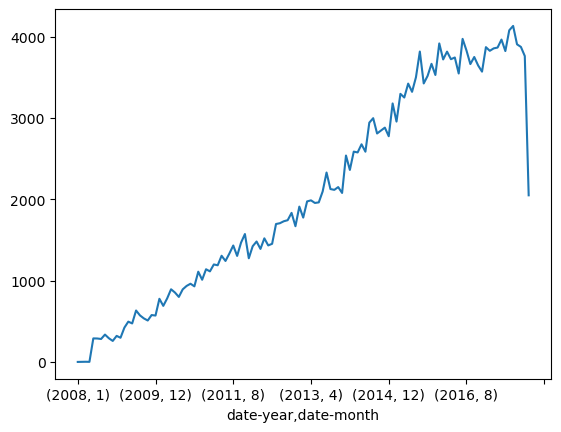

In [18]:
reviews.groupby(['date-year', 'date-month'])['business_id'].apply(lambda x: len(x.unique())).plot()

In [51]:
reviews = reviews[reviews['business_id'].isin(many_reviews)]

In [165]:
train_set = business[business['business_id'].isin(reviews[reviews['date-year'] < 2015]['business_id'].tolist())]
validation_set = business[business['business_id'].isin(reviews[reviews['date-year'] == 2015]['business_id'].tolist())]
test_set = business[business['business_id'].isin(reviews[reviews['date-year'] == 2016]['business_id'].tolist())]

In [166]:
train_set_y = reviews[reviews['date-year'] == 2016].groupby(['business_id'], as_index=False)['stars'].mean()

In [167]:
train_set = train_set.merge(train_set_y, on='business_id', how='left')

In [141]:
# get the text of the last review for each business prior to 2015
# last_review = reviews[reviews['date-year'] < 2015].sort_values('date').groupby(['business_id'], as_index=False)['text'].last().rename(columns={'text': 'last_review'})
# second_to_last_review = reviews[reviews['date-year'] < 2015].sort_values('date').groupby(['business_id'], as_index=False).nth(-2)[['business_id', 'text']].rename(columns={'text': 'second_to_last_review'})
# third_to_last_review = reviews[reviews['date-year'] < 2015].sort_values('date').groupby(['business_id'], as_index=False).nth(-3)[['business_id', 'text']].rename(columns={'text': 'third_to_last_review'})

# # add the text of the last reviews to the training set

# train_set = train_set.merge(last_review, on='business_id', how='left')
# train_set = train_set.merge(second_to_last_review, on='business_id', how='left')
# train_set = train_set.merge(third_to_last_review, on='business_id', how='left')

In [160]:
last_3_reviews = reviews[reviews['date-year'] < 2015].sort_values('date').groupby(['business_id'], as_index=False).nth[-3:].groupby(['business_id'], as_index=False)['text'].sum()

In [162]:
last_3_reviews['text'] = last_3_reviews['text'].str.replace('\\n', '')

C:\Users\Joeyz\AppData\Local\Temp\ipykernel_18756\270049060.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  last_3_reviews['text'] = last_3_reviews['text'].str.replace('\\n', '')


In [168]:
train_set = train_set.merge(last_3_reviews, on='business_id', how='left')

In [169]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2', )
embeddings = model.encode(train_set['text'].tolist())
embedding_df = pd.DataFrame(embeddings)

In [145]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2', )


Downloading: 100%|██████████| 1.18k/1.18k [00:00<00:00, 589kB/s]
Downloading: 100%|██████████| 190/190 [00:00<00:00, 186kB/s]
Downloading: 100%|██████████| 10.6k/10.6k [00:00<00:00, 3.55MB/s]
Downloading: 100%|██████████| 116/116 [00:00<00:00, 58.2kB/s]
Downloading: 100%|██████████| 39.3k/39.3k [00:00<00:00, 2.53MB/s]
Downloading: 100%|██████████| 90.9M/90.9M [00:04<00:00, 21.3MB/s]
Downloading: 100%|██████████| 53.0/53.0 [00:00<00:00, 26.1kB/s]
Downloading: 100%|██████████| 112/112 [00:00<00:00, 112kB/s]
Downloading: 100%|██████████| 466k/466k [00:00<00:00, 4.56MB/s]
Downloading: 100%|██████████| 350/350 [00:00<00:00, 344kB/s]
Downloading: 100%|██████████| 13.2k/13.2k [00:00<00:00, 6.61MB/s]
Downloading: 100%|██████████| 232k/232k [00:00<00:00, 3.35MB/s]
Downloading: 100%|██████████| 349/349 [00:00<00:00, 176kB/s]


In [170]:
embeddings = model.encode(train_set['text'].tolist())

In [171]:
embedding_df = pd.DataFrame(embeddings)

In [178]:
combined_train = pd.concat([train_set, embedding_df], axis=1)

In [187]:
combined_train[['latitude', 'longitude']] = combined_train[['latitude', 'longitude']].astype(float)

#take only latitude, longitude, and the embeddings
combined_train_X = combined_train[['latitude', 'longitude'] + list(range(0, 384))]
combined_train_y = combined_train['stars_y'].fillna(0)

In [186]:
combined_train_X

,latitude,longitude,0,1,2,3,4,5,6,7,...,374,375,376,377,378,379,380,381,382,383
0,43.661582,-79.408878,0.023783,0.022643,0.019515,0.030034,-0.024914,-0.004611,0.030831,0.013491,...,0.011379,-0.015872,0.005145,0.047860,0.051474,0.089557,0.006921,-0.027636,-0.098616,-0.023548
1,43.867918,-79.283687,-0.051787,-0.009935,0.105574,0.019747,-0.068042,-0.026589,-0.043888,-0.114656,...,-0.002334,0.023066,-0.004185,0.038180,0.028417,0.093048,0.002385,0.001638,-0.127830,0.003826
2,43.864333,-79.382411,0.003443,0.041327,0.067640,0.031403,-0.006855,-0.045600,-0.012216,-0.013116,...,0.039508,-0.045377,0.069300,-0.008683,0.028686,0.063617,-0.011875,-0.024637,-0.059631,0.052534
3,43.792978,-79.260276,-0.005828,-0.053238,0.076804,-0.021372,-0.082224,0.011955,0.028351,-0.056819,...,0.007044,-0.010890,-0.014776,-0.019790,0.023705,0.075824,-0.065780,0.065467,-0.094342,0.000830
4,43.653324,-79.395372,-0.039152,0.033267,0.010167,0.062915,-0.068090,0.027040,0.017302,-0.044266,...,-0.002576,-0.000096,0.023617,-0.018464,0.049787,0.028141,-0.012060,0.002423,-0.089931,-0.054461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,43.655731,-79.384360,-0.031210,-0.003330,0.070105,0.093040,-0.093634,0.042095,-0.040348,-0.063556,...,0.004932,0.018994,-0.063911,0.001288,0.054657,0.022020,-0.007484,0.011327,-0.132401,0.081960
2146,43.648778,-79.449979,-0.004922,-0.016848,0.081768,0.014475,-0.155371,-0.044138,-0.016204,-0.008865,...,0.012604,0.040532,-0.056169,0.036433,0.059521,0.074581,0.039502,0.004661,-0.070318,-0.001181
2147,43.654981,-79.386619,-0.041243,0.031383,0.067185,0.091737,-0.054903,-0.065656,0.016691,-0.029797,...,0.022796,0.046485,0.052137,0.044651,0.050618,0.135087,0.017371,-0.020462,-0.122473,0.062606
2148,43.660522,-79.342412,-0.014537,-0.011716,0.043628,0.093377,0.019246,-0.012191,0.041683,-0.058000,...,-0.027903,-0.056613,-0.086559,0.027199,0.018218,0.022008,0.021075,0.048366,-0.025185,-0.021610


In [184]:
#linear regression
from sklearn.linear_model import LinearRegression

In [188]:
lr = LinearRegression()
lr.fit(combined_train_X, combined_train_y)

c:\ProgramData\Miniconda3\envs\edge_project\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [189]:
lr.score(combined_train_X, combined_train_y)

c:\ProgramData\Miniconda3\envs\edge_project\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.253295282112737

In [194]:
#Tree
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(combined_train_X, combined_train_y)


c:\ProgramData\Miniconda3\envs\edge_project\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeRegressor(max_depth=10)

In [195]:
tree.score(combined_train_X, combined_train_y)

c:\ProgramData\Miniconda3\envs\edge_project\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.3759245769625522

In [54]:
#for each business, get the average rating for each rolling 3 month period
#reviews['rolling_3m'] = reviews.groupby(['business_id'])['stars'].rolling(3).mean().reset_index(0,drop=True)
avg_rating = reviews.groupby(['business_id','date-month','date-year'])['stars'].mean().reset_index()

In [59]:
rollings = avg_rating.groupby('business_id')['stars'].rolling(3).mean()

In [70]:
avg_rating.sort_values(['business_id','date-year','date-month']).head(20)

,business_id,date-month,date-year,stars
0,-0DET7VdEQOJVJ_v6klEug,5,2017,3.000000
1,-0DET7VdEQOJVJ_v6klEug,6,2017,3.625000
2,-0DET7VdEQOJVJ_v6klEug,7,2017,2.857143
3,-0DET7VdEQOJVJ_v6klEug,8,2017,2.611111
4,-0DET7VdEQOJVJ_v6klEug,9,2017,2.750000
5,-0DET7VdEQOJVJ_v6klEug,10,2017,3.444444
6,-0DET7VdEQOJVJ_v6klEug,11,2017,3.000000
28,-0NrB58jqKqJfuUCDupcsw,9,2014,1.000000
7,-0NrB58jqKqJfuUCDupcsw,1,2015,3.250000
11,-0NrB58jqKqJfuUCDupcsw,3,2015,3.000000
